# Final Project

Name: Mohamed Ahmed Emary

Dataset: `churn_modeling.csv`

In this project, I will try to predict if a customer will leave the bank or not using the bank's data about its customers.


## Importing All Project Libraries


In [189]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from scipy import stats
sns.set(style="darkgrid", font_scale=1.5)

## Loading the Dataset


In [117]:
df = pd.read_csv("churn_modeling.csv")

In [118]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [119]:
print(f"Columns in the dataset : {df.shape[1]}")
print(f"Rows in the dataset: {df.shape[0]}")

Columns in the dataset : 14
Rows in the dataset: 9804


In [120]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9804 non-null   int64  
 1   CustomerId       9804 non-null   int64  
 2   Surname          9804 non-null   object 
 3   CreditScore      9804 non-null   int64  
 4   Geography        9804 non-null   object 
 5   Gender           9804 non-null   object 
 6   Age              9804 non-null   int64  
 7   Tenure           9804 non-null   int64  
 8   Balance          9804 non-null   float64
 9   NumOfProducts    9804 non-null   int64  
 10  HasCrCard        9804 non-null   int64  
 11  IsActiveMember   9804 non-null   int64  
 12  EstimatedSalary  9804 non-null   float64
 13  Exited           9804 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.0+ MB


In [122]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Since the dataset has no missing values, we will not need to do any imputation.**


In [123]:
# Checking Duplicate Records.
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


**Since the dataset has no Duplicate Records, we will not need to do any deduplication.**


In [124]:
# See the distribution of the categorical variables
df.describe(include="object")  # Transpose the table

,Surname,Geography,Gender
count,9804,9804,9804
unique,2896,3,2
top,Smith,France,Male
freq,32,4920,5352


In [125]:
# See the distribution of the numerical variables
df.describe(include="number")

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9804.000000,9.804000e+03,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000
mean,4944.664933,1.569100e+07,650.535598,38.916157,5.014994,76567.289547,1.528458,0.705426,0.514892,100033.740389,0.202060
std,2874.485711,7.189959e+04,96.663725,10.478353,2.893548,62423.278032,0.581171,0.455874,0.499804,57569.646657,0.401558
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2468.750000,1.562858e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50904.965000,0.000000
50%,4919.500000,1.569081e+07,652.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000,100129.330000,0.000000
75%,7370.250000,1.575322e+07,718.000000,44.000000,8.000000,127676.242500,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [126]:
# See the last 5 records
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9799,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9800,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9801,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9802,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9803,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [127]:
# Since CustomerId and Surname will not affect whether a customer will leave the bank or not, we can drop them.

df.drop(["CustomerId", "Surname"], axis=1, inplace=True)
# axis=1 means column-wise operation
# inplace=True means the changes will be made in the original dataframe

In [128]:
# Renaming target column values with more appropirate values for better Analysis.
# df["Exited"].replace({0:"No",1:"Yes"},inplace=True)
# df.head()

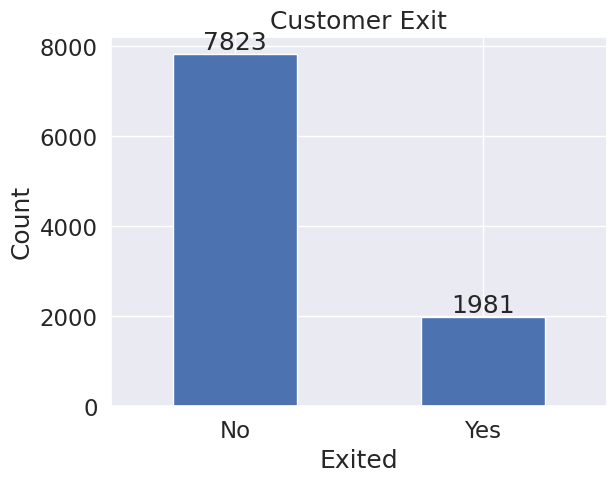

In [129]:
# Visualizing Target Variable.
# Plotting a histogram of values in the target column

# Create temp column with mapped values
df['Exited_mapped'] = df['Exited'].map({0: 'No', 1: 'Yes'})

ax = df['Exited_mapped'].value_counts().plot.bar(
    rot=0)  # rot=0 to keep labels horizontal

ax.bar_label(ax.containers[0])

ax.set_xlabel('Exited')
ax.set_ylabel('Count')
plt.title('Customer Exit')
plt.show()

# Drop temp column
df = df.drop('Exited_mapped', axis=1)

From the plot above, we can see that the dataset is imbalanced which can lead to biased predictions. So, we will need to balance the dataset by oversampling the minority class using SMOTE technique.


In [130]:
# define a function to plot a histogram of a column
def countplot(column):
    plt.figure(figsize=(15, 5))

    # countplot is a seaborn function to plot the histogram
    # x=column name passed to the function
    # hue="Exited" to split by Exited values
    ax = sns.countplot(x=column, data=df, hue="Exited")

    for value in ax.patches:  # ax.patches gives us the bars in the plot

        # Calculate the percentage by dividing the height of the bar by total number of records
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x, y))
    plt.title(f"Customer Exited by {column}")
    plt.show()

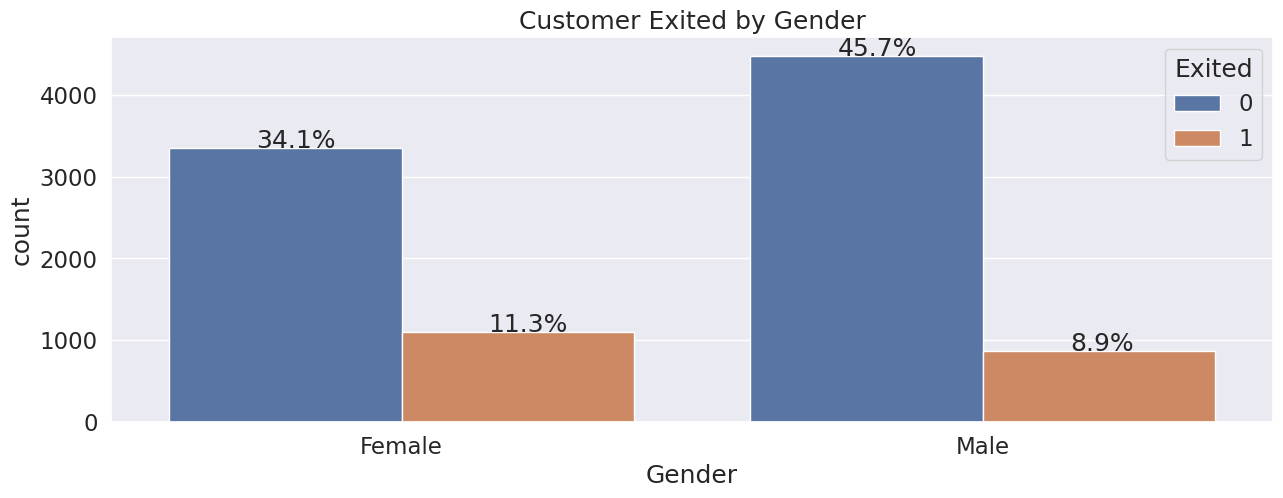

In [131]:
countplot("Gender")

From the plot above we see that female customers tend more to deactivate their bank services more than men.


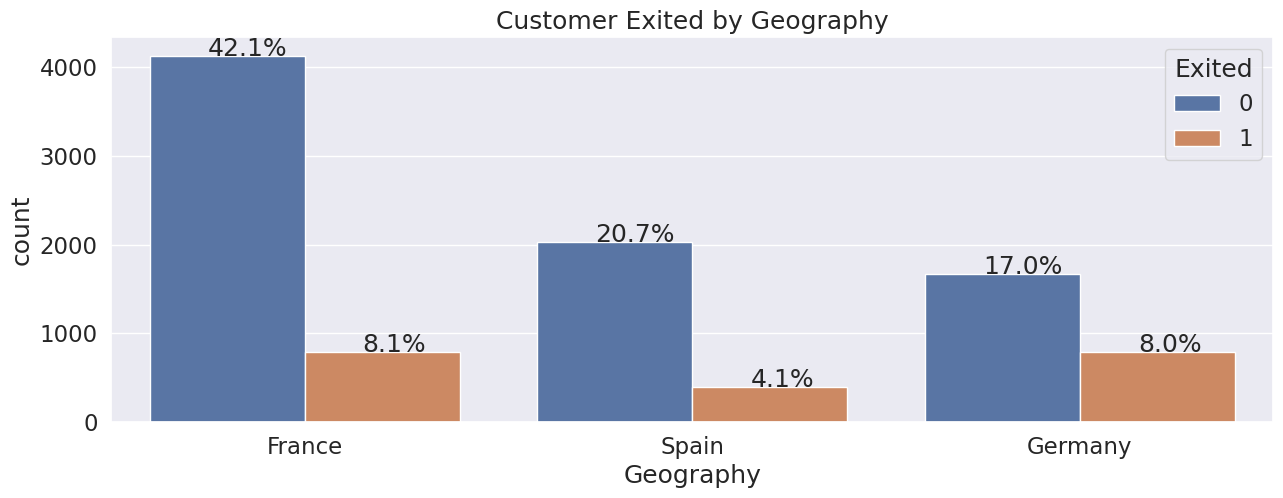

In [132]:
countplot("Geography")

From the plot above we see that customers from Germany tend more to deactivate their bank services more than customers from Spain and France considering the number of customers from each country.


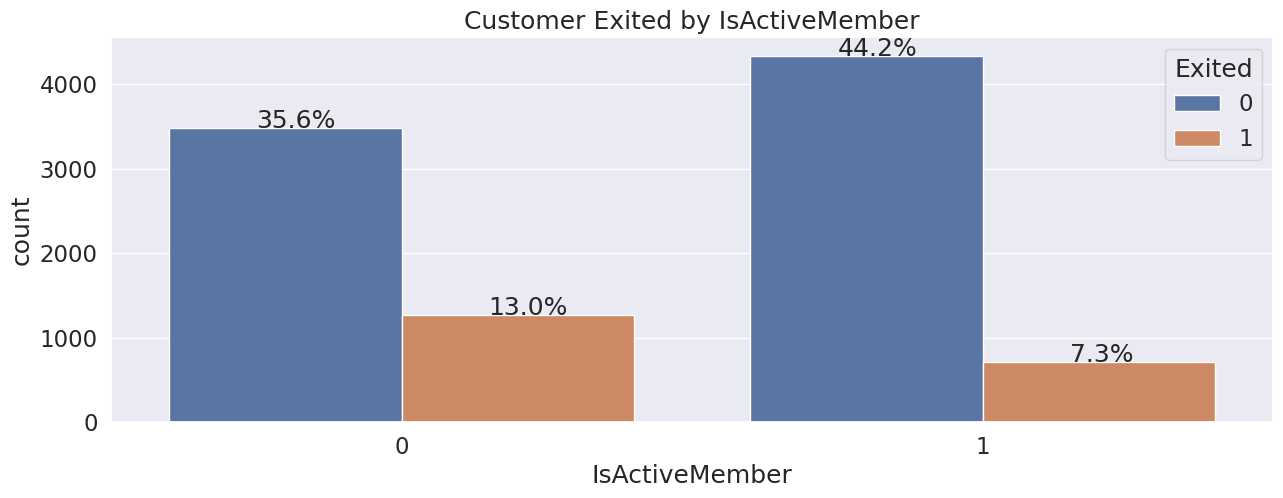

In [133]:
countplot("IsActiveMember")

From the plot we can see that customers which are not active are morely likely to deactivate their banking facilities.


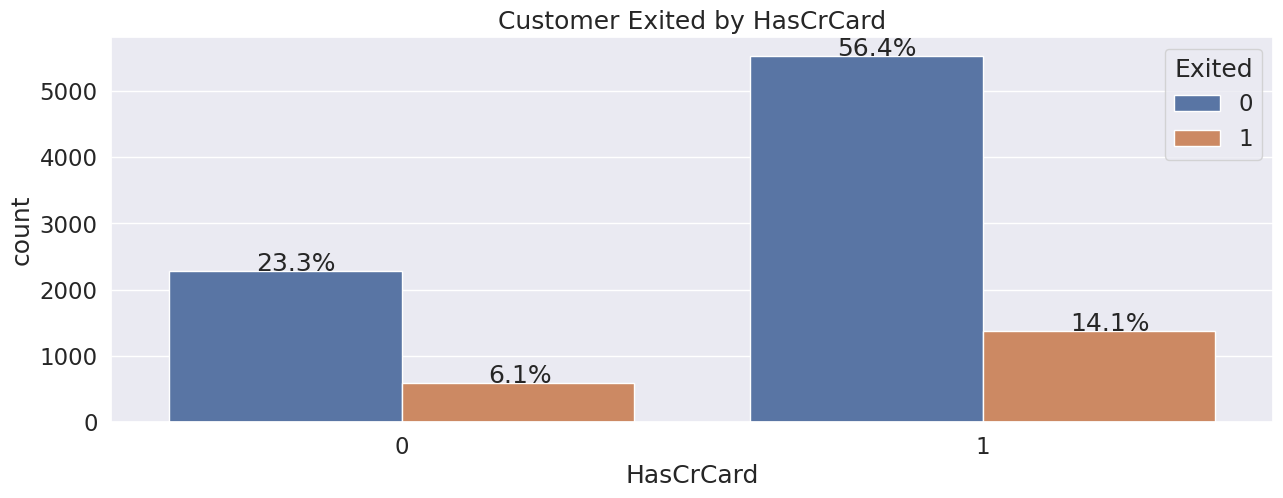

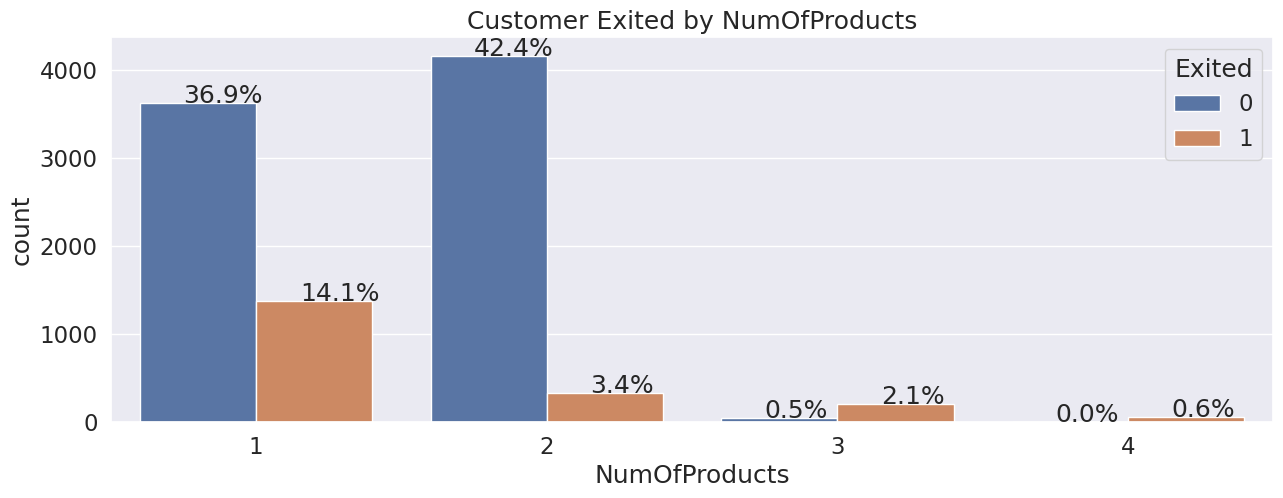

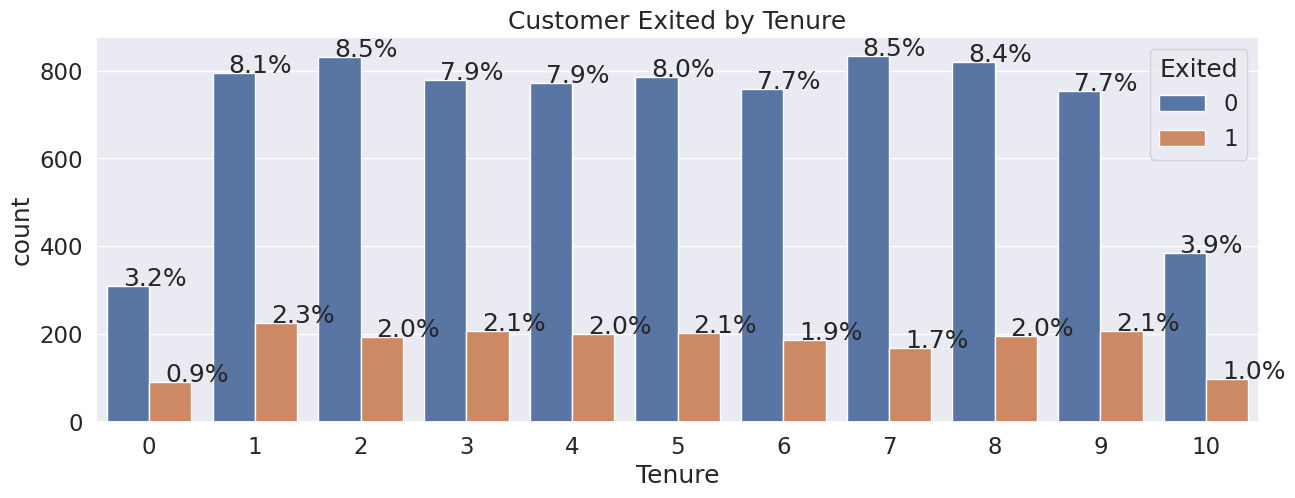

In [134]:
countplot("HasCrCard")
countplot("NumOfProducts")
countplot("Tenure")

In [135]:
  def continous_plot(column):
      plt.figure(figsize=(13,6))
      plt.subplot(1,2,1)
      sns.histplot(x=column,hue="Exited",data=df,kde=True)  # kde=True to plot the density curve
      plt.title(f"Distribution of {column} by Churn Status")

      plt.subplot(1,2,2)
      sns.boxplot(x="Exited", y=column, data=df)
      plt.title(f"Distribution of {column} by Churn Status")
      plt.tight_layout()
      plt.show()

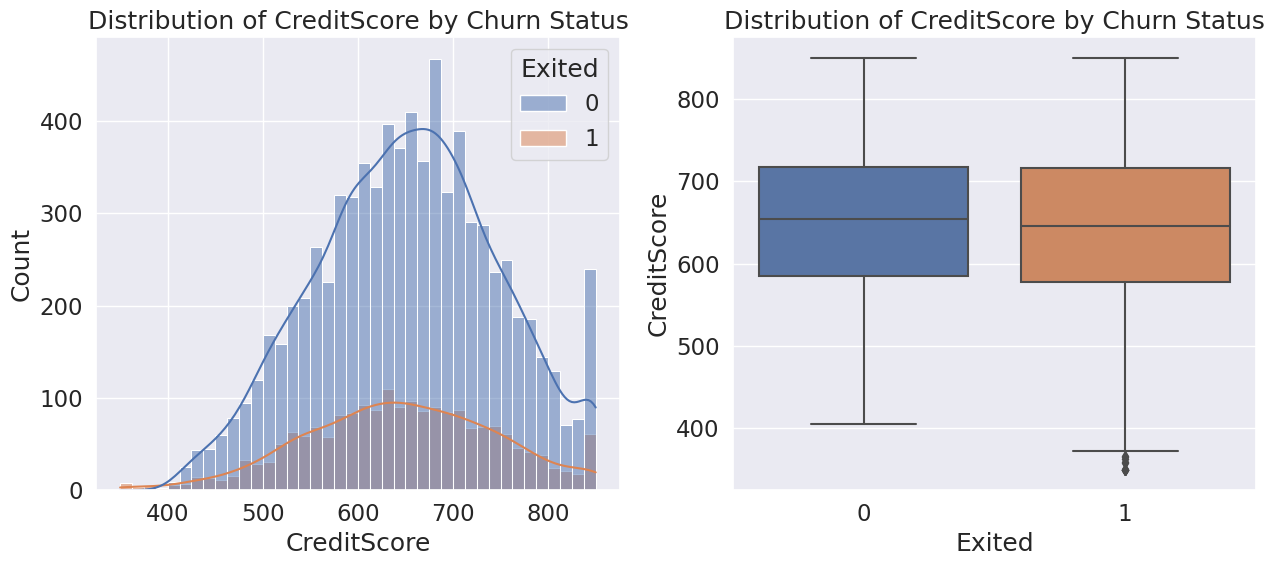

In [136]:
continous_plot("CreditScore")

In the plots above $0$ means No and $1$ means Yes


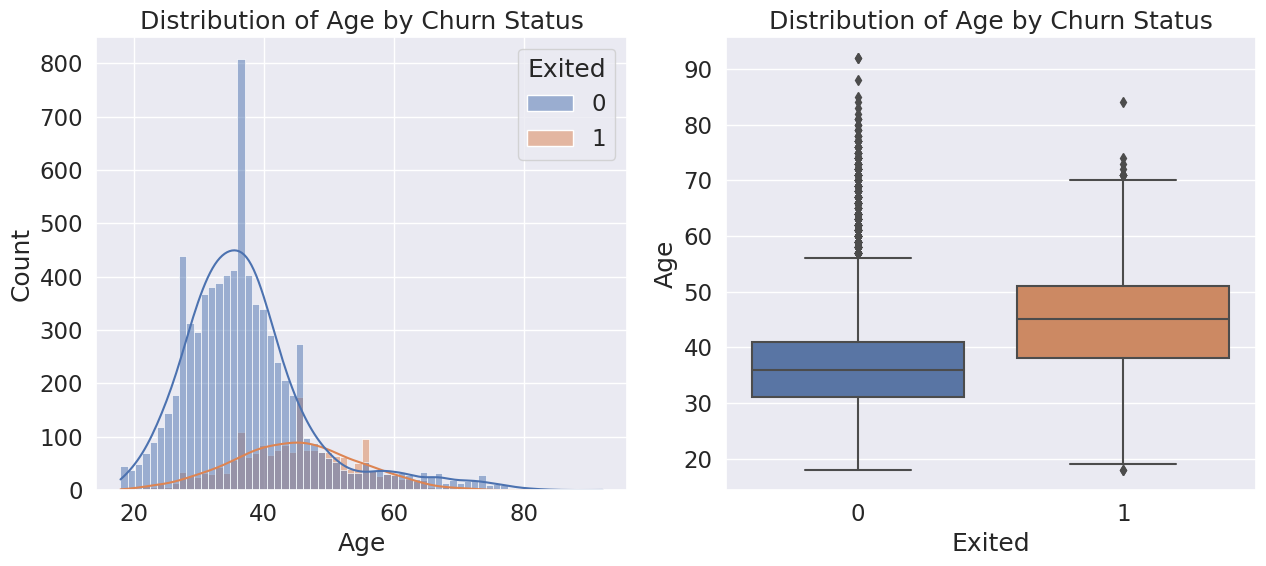

In [137]:
continous_plot("Age")

The distribution is **right skewed** because of **outliers** which can lead to overfitting in model.

To overcome this right-skewed distribution we can use **log normal transformation** technique to bring a **normal distribution**.


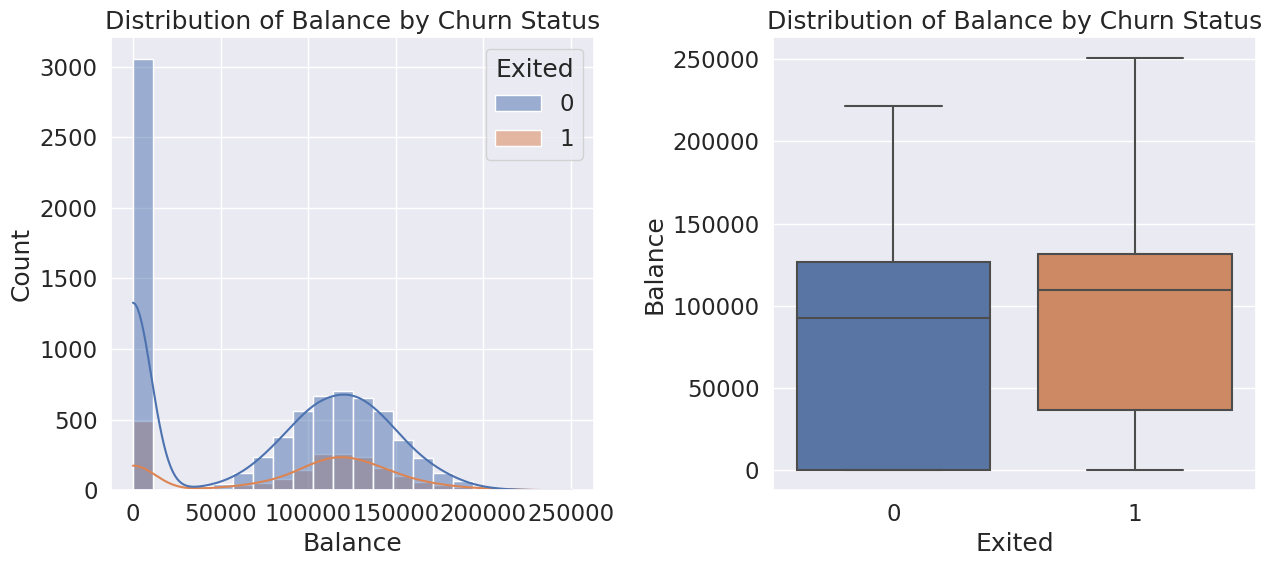

In [138]:
continous_plot("Balance")

Customers with zero balance are more likely to deactivate their bank services.


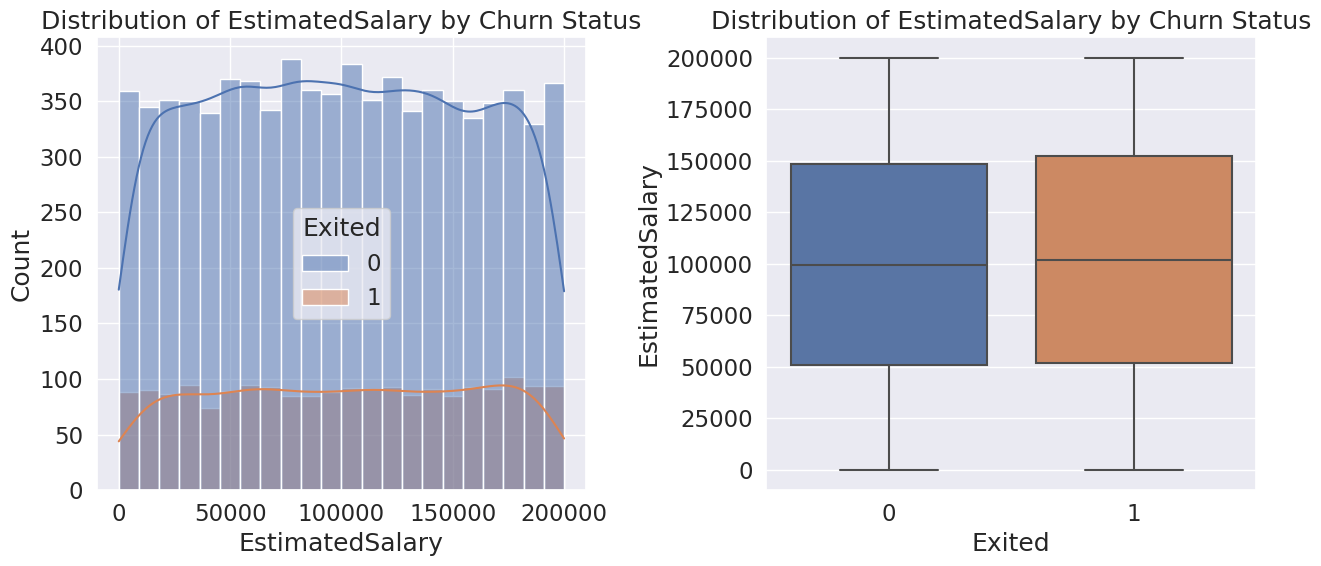

In [139]:
continous_plot("EstimatedSalary")

## Data Preprocessing


In [140]:
cat_cols = ["Geography", "Gender"]

for column in cat_cols:
    print(f"Unique Values in {column} column is:", df[column].unique())
    print("-"*100)

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
----------------------------------------------------------------------------------------------------
Unique Values in Gender column is: ['Female' 'Male']
----------------------------------------------------------------------------------------------------


In [141]:
# one hot encoding categorical columns
df = pd.get_dummies(columns=cat_cols, data=df)

In [142]:
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [143]:
cols = ["CreditScore", "Age", "EstimatedSalary"]
# Checking Skewness of Numeric Features.
df[cols].skew()

CreditScore       -0.074078
Age                1.013317
EstimatedSalary    0.003785
dtype: float64

- Age Feature is highly right-skewed, Because of positive outliers. Which may affect the performance of our model.

- We will use log normal transformation to achieve a normal distribution.


In [144]:
# Storing the previous Age values to compare these values with the transformed values.
old_age = df["Age"]

# Applying Log Transformation on Age Column.
df["Age"] = np.log(df["Age"])

Visualizing Age before and after transformation.


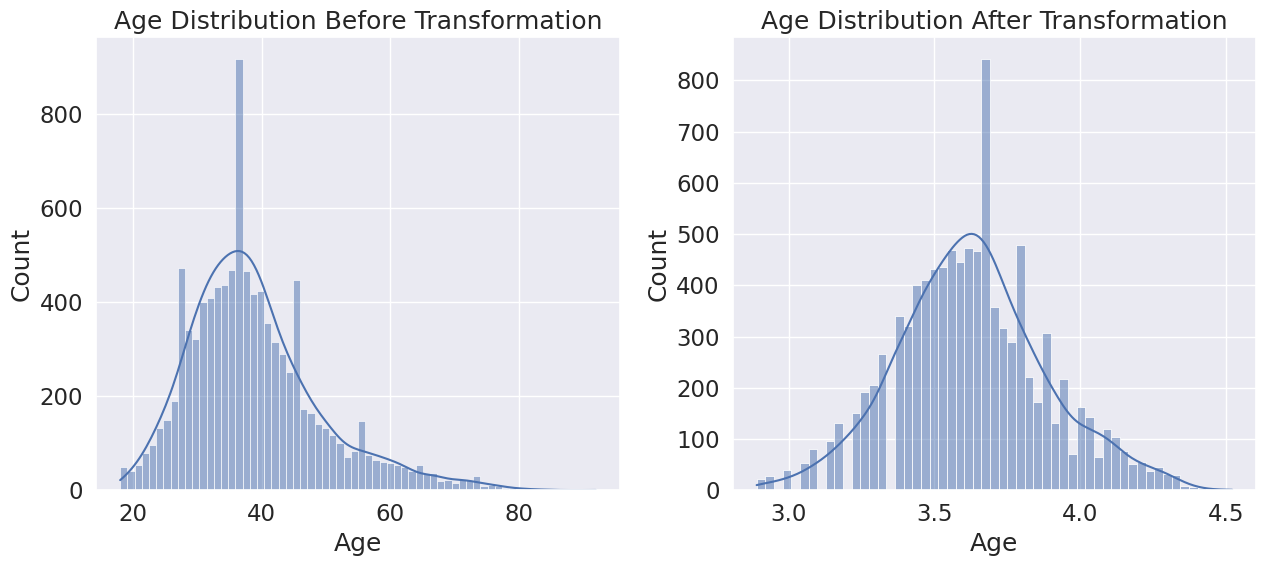

In [145]:
plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(old_age, kde=True)  # kde=True to plot the density curve
plt.title("Age Distribution Before Transformation")

plt.subplot(1, 2, 2)
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution After Transformation")
plt.tight_layout()
plt.show()

Now our age column is normally distributed.


---

Dividing the dataset into features and target.


In [146]:
# X contains all columns except "Exited"
X = df.drop(columns=["Exited"])

# y contains just the "Exited" column
y = df["Exited"]

In [147]:
X.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,619,3.737670,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,2,608,3.713572,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,3,502,3.737670,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,4,699,3.663562,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,5,850,3.761200,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [148]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Split the dataset into train and test sets


In [149]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [150]:
print("Shape of x_train is:", x_train.shape)
print("Shape of x_test is: ", x_test.shape)
print("Shape of y_train is:", y_train.shape)
print("Shape of y_test is: ", y_test.shape)

Shape of x_train is: (7843, 14)
Shape of x_test is:  (1961, 14)
Shape of y_train is: (7843,)
Shape of y_test is:  (1961,)


As we know that the dataset is imbalanced as the number of customers who left the bank is less than the number of customers who stayed with the bank. So, we will need to balance the dataset by oversampling the minority class using SMOTE technique.


In [151]:
# Applying SMOTE to Overcome the Class-Imbalance in Target Variable.
smt = SMOTE(random_state=42)

In [152]:
x_train_resampled, y_train_resampled = smt.fit_resample(x_train, y_train)

In [153]:
print("Shape of x_train_resampled is:", x_train_resampled.shape)
print("Shape of y_train_resampled is:", y_train_resampled.shape)

Shape of x_train_resampled is: (12488, 14)
Shape of y_train_resampled is: (12488,)


In [154]:
y_train_resampled.value_counts().to_frame()

,Exited
1,6244
0,6244


Both categories in Target variable are now having equal number of records. Now our model will not be biased towards any category.


## Creating DTree Model


In [155]:
dtree = DecisionTreeClassifier()

In [156]:
param_grid = {"max_depth": [5, 6, 7, 8],
              "min_samples_split": [4, 5, 6, 7],
              "min_samples_leaf": [1, 2, 3, 4, 5],
              "criterion": ["gini", "entropy"],
              "splitter": ["best", "random"],
              "max_features": ["auto", None],
              "random_state": [0, 42]}

In [157]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [158]:
# Best Parameters for DecisionTree Model.
dtree_best_parameters = grid_search.best_params_

print(f"Best Parameters for DecisionTree Model is:\n{dtree_best_parameters}")

Best Parameters for DecisionTree Model is:
{'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 4, 'random_state': 0, 'splitter': 'best'}


In [159]:
dtree = DecisionTreeClassifier(**dtree_best_parameters)

dtree.fit(x_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=4,
                       random_state=0)

**Computing Model Accuracy.**


In [160]:
y_train_pred = dtree.predict(x_train_resampled)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>", round(
    accuracy_score(y_train_resampled, y_train_pred)*100, 2), "%")
print("Accuracy Score of Model on Testing Data  is =>",
      round(accuracy_score(y_test, y_test_pred)*100, 2), "%")

Accuracy Score of Model on Training Data is => 88.05 %
Accuracy Score of Model on Testing Data  is => 83.07 %


**Model Evaluation using Different Metric Values.**


In [161]:
print("F1 Score of the Model is =>", f1_score(
    y_test, y_test_pred, average="micro"))
print("Recall Score of the Model is =>", recall_score(
    y_test, y_test_pred, average="micro"))
print("Precision Score of the Model is =>",
      precision_score(y_test, y_test_pred, average="micro"))

F1 Score of the Model is => 0.8306986231514534
Recall Score of the Model is => 0.8306986231514534
Precision Score of the Model is => 0.8306986231514534


In [162]:
def confusion_mat(y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)

    plt.figure(figsize=(15, 6))
    # annot=True to annotate cells
    # fmt="g" to remove scientific notation
    sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g")
    plt.title("Model Evaluation using Confusion Matrix")
    plt.ylabel("Actual Labels")
    plt.xlabel("Predicted Labels")
    plt.show()

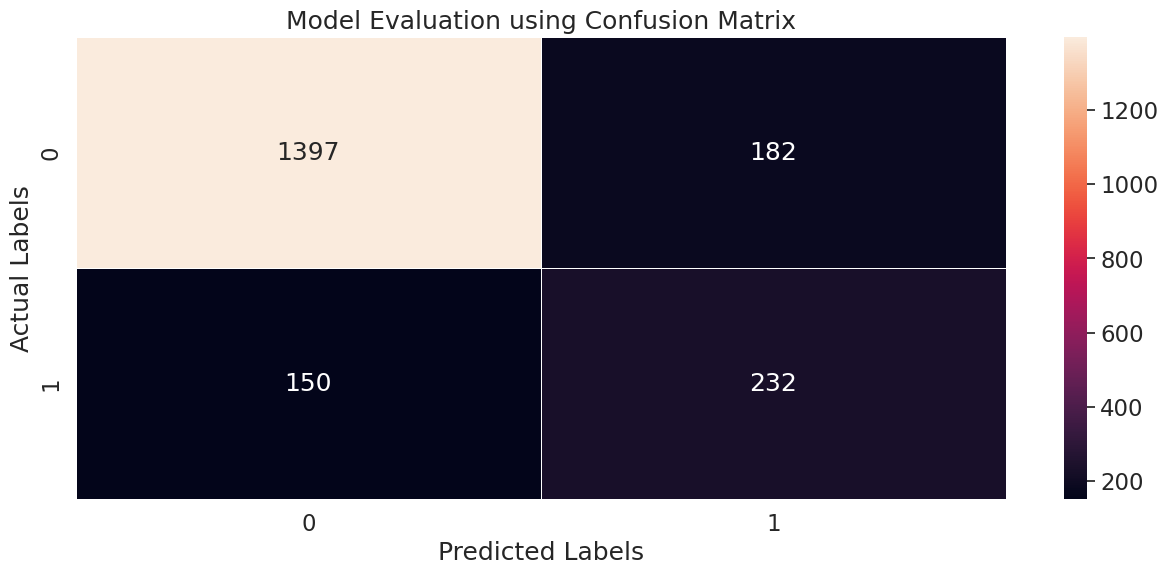

In [163]:
confusion_mat(y_test, y_test_pred)

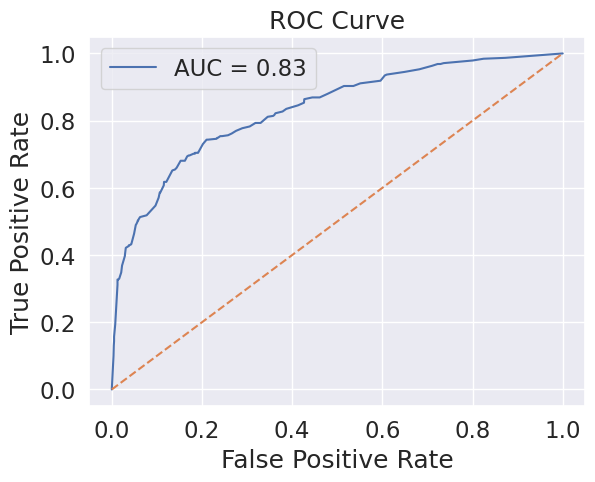

In [164]:
y_pred_proba = dtree.predict_proba(x_test)[:][:, 1]

df_actual_predicted = pd.concat(
    [pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Creating Random Forest Model


In [165]:
rfc = RandomForestClassifier()

In [166]:
param_grid = {"max_depth": [6, 7, 8],
              "min_samples_split": [5, 6, 7],
              "min_samples_leaf": [4, 5, 6],
              "n_estimators": [50, 70],
              "criterion": ["gini", "entropy"]}

In [167]:
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8], 'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [5, 6, 7],
                         'n_estimators': [50, 70]})

In [169]:
# Getting Best Parameters for RandomForest Model.
rforest_best_parameters = grid_search.best_params_

print("Best Parameters for RandomForest Model is:\n\n")
rforest_best_parameters

Best Parameters for RandomForest Model is:




{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 70}

In [170]:
# Create RandomForest Model with Best Parameters.
rfc = RandomForestClassifier(**rforest_best_parameters)

rfc.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       min_samples_split=7, n_estimators=70)

In [171]:
y_train_pred = rfc.predict(x_train_resampled)
y_test_pred = rfc.predict(x_test)

print("Accuracy Score of Model on Training Data is =>", round(
    accuracy_score(y_train_resampled, y_train_pred)*100, 2), "%")
print("Accuracy Score of Model on Testing Data  is =>",
      round(accuracy_score(y_test, y_test_pred)*100, 2), "%")

Accuracy Score of Model on Training Data is => 89.37 %
Accuracy Score of Model on Testing Data  is => 83.73 %


In [172]:
print("F1 Score of the Model is =>", f1_score(
    y_test, y_test_pred, average="micro"))
print("Recall Score of the Model is =>", recall_score(
    y_test, y_test_pred, average="micro"))
print("Precision Score of the Model is =>",
      precision_score(y_test, y_test_pred, average="micro"))

F1 Score of the Model is => 0.8373278939316675
Recall Score of the Model is => 0.8373278939316675
Precision Score of the Model is => 0.8373278939316675


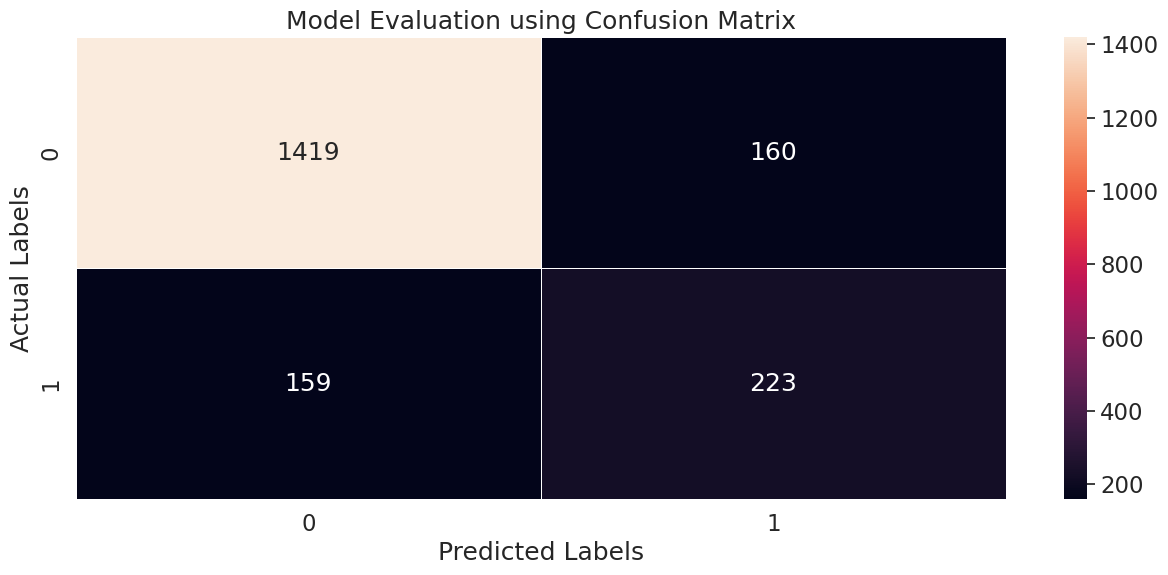

In [173]:
confusion_mat(y_test, y_test_pred)

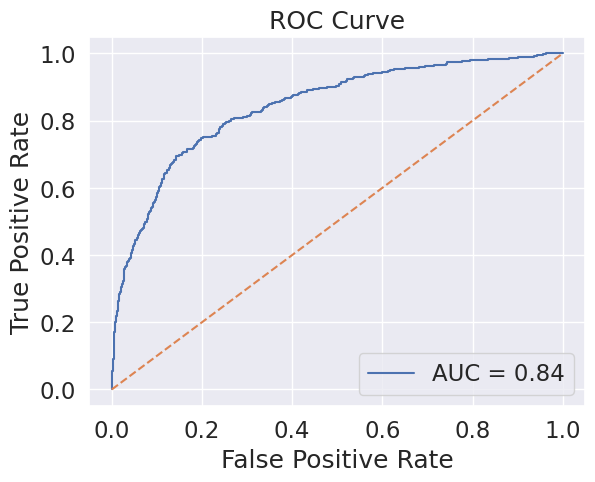

In [174]:
y_pred_proba = rfc.predict_proba(x_test)[:][:, 1]

df_actual_predicted = pd.concat(
    [pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Creating KNN Model

In [206]:
knn = KNeighborsClassifier()

In [207]:
param_grid = {"n_neighbors":np.arange(1,50),
              "weights": ["uniform","distance"],
              "metric":["euclidean","manhattan"]}

In [208]:
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [209]:
# Getting Best Parameters for RandomForest Model.
knn_best_parameters = grid_search.best_params_

print("Best Parameters for RandomForest Model is:")
knn_best_parameters

Best Parameters for RandomForest Model is:


{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [210]:
# Create RandomForest Model with Best Parameters.
knn = KNeighborsClassifier(**knn_best_parameters)

knn.fit(x_train_resampled, y_train_resampled)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [211]:
y_train_pred = knn.predict(x_train_resampled)
y_test_pred = knn.predict(x_test)

print("Accuracy Score of Model on Training Data is =>", round(
    accuracy_score(y_train_resampled, y_train_pred)*100, 2), "%")
print("Accuracy Score of Model on Testing Data  is =>",
      round(accuracy_score(y_test, y_test_pred)*100, 2), "%")

Accuracy Score of Model on Training Data is => 100.0 %
Accuracy Score of Model on Testing Data  is => 62.52 %


In [203]:
print("F1 Score of the Model is =>", f1_score(
    y_test, y_test_pred, average="micro"))
print("Recall Score of the Model is =>", recall_score(
    y_test, y_test_pred, average="micro"))
print("Precision Score of the Model is =>",
      precision_score(y_test, y_test_pred, average="micro"))

F1 Score of the Model is => 0.6251912289648138
Recall Score of the Model is => 0.6251912289648138
Precision Score of the Model is => 0.6251912289648138


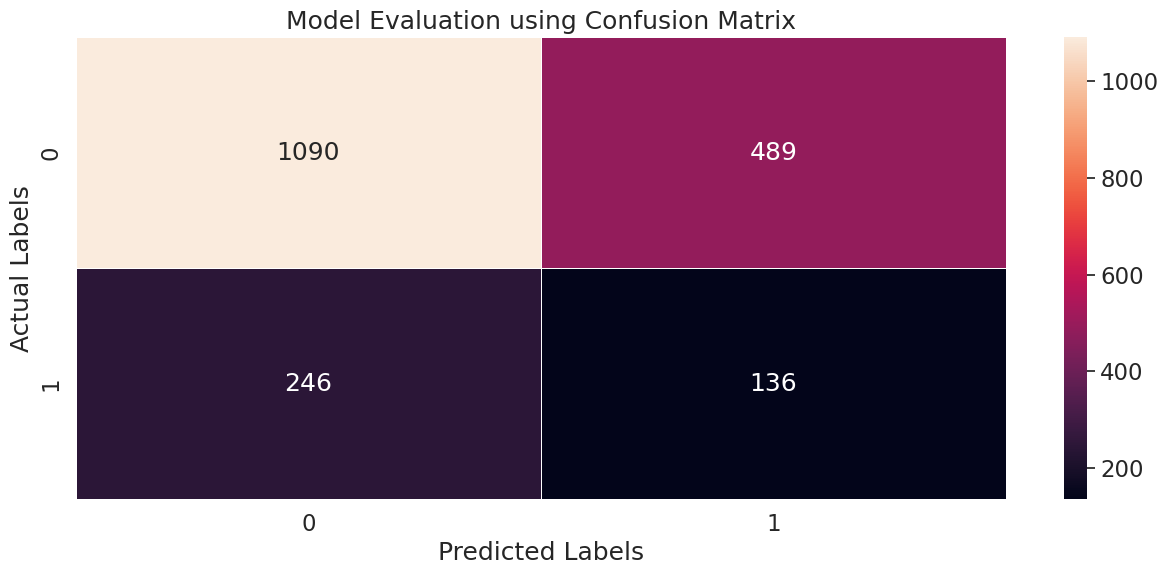

In [204]:
confusion_mat(y_test, y_test_pred)

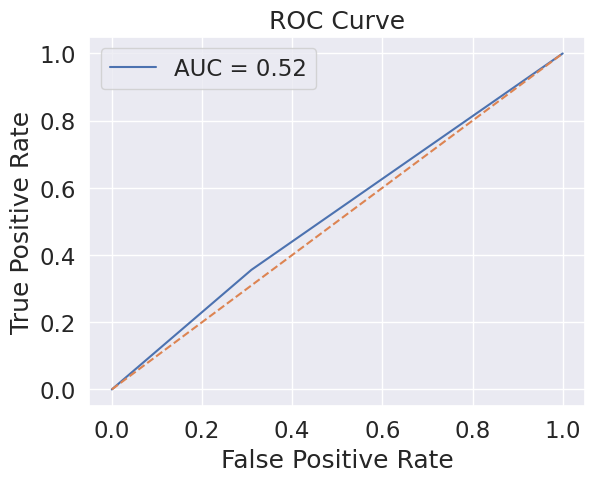

In [205]:
y_pred_proba = knn.predict_proba(x_test)[:][:, 1]

df_actual_predicted = pd.concat(
    [pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Stacking Classifier

In [221]:
models = [('dtree',dtree),('rfc',rfc),('knn',knn)]

stack = StackingClassifier(estimators=models,final_estimator=DecisionTreeClassifier())
stack.fit(x_train_resampled, y_train_resampled)

StackingClassifier(estimators=[('dtree',
                                DecisionTreeClassifier(max_depth=8,
                                                       min_samples_leaf=5,
                                                       min_samples_split=4,
                                                       random_state=0)),
                               ('rfc',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=8,
                                                       min_samples_leaf=4,
                                                       min_samples_split=7,
                                                       n_estimators=70)),
                               ('knn',
                                KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=1))],
                   final_estimator=DecisionTreeClassifier())

In [224]:
y_train_pred = stack.predict(x_train_resampled)
y_test_pred = stack.predict(x_test)

In [225]:
print("Accuracy Score of Model on Training Data is =>", round(
    accuracy_score(y_train_resampled, y_train_pred)*100, 2), "%")
print("Accuracy Score of Model on Testing Data  is =>",
      round(accuracy_score(y_test, y_test_pred)*100, 2), "%")


Accuracy Score of Model on Training Data is => 91.68 %
Accuracy Score of Model on Testing Data  is => 78.28 %


In [226]:

print("F1 Score of the Model is =>", f1_score(
    y_test, y_test_pred, average="micro"))
print("Recall Score of the Model is =>", recall_score(
    y_test, y_test_pred, average="micro"))
print("Precision Score of the Model is =>",
      precision_score(y_test, y_test_pred, average="micro"))

F1 Score of the Model is => 0.7827638959714431
Recall Score of the Model is => 0.7827638959714431
Precision Score of the Model is => 0.7827638959714431


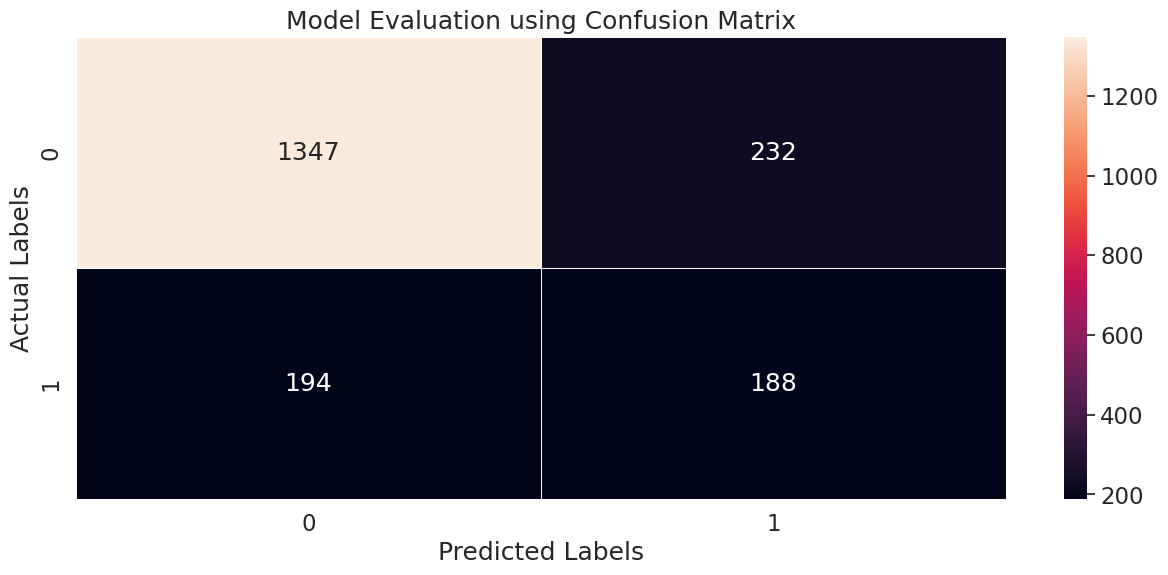

In [227]:
confusion_mat(y_test, y_test_pred)

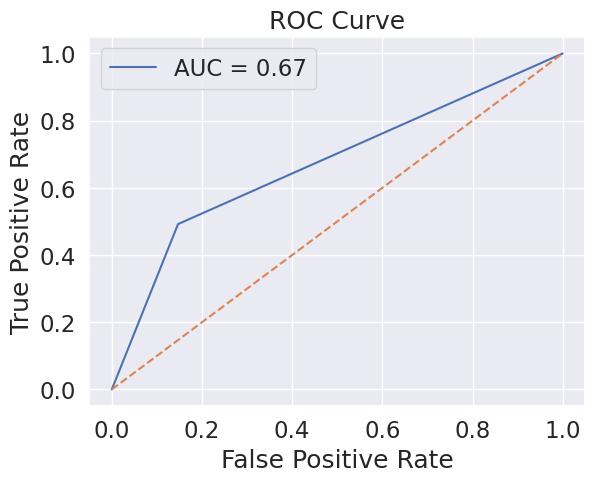

In [228]:
y_pred_proba = stack.predict_proba(x_test)[:][:, 1]

df_actual_predicted = pd.concat(
    [pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [244]:
# load the hidden test set
hidden_df = pd.read_csv("churn_modeling_test_hidden.csv")

# one hot encoding categorical columns
hidden_df = pd.get_dummies(columns=cat_cols, data=hidden_df)

In [245]:
# make predictions on hidden test set then append the predictions to the dataframe
hidden_df["Exited"] = stack.predict(hidden_df.drop(columns=["CustomerId", "Surname"]))
hidden_df.head()

# save the predictions to csv file
hidden_df.to_csv("hidden_test_predictions.csv", index=False)